# Topic Modeling with Gensim

### Installation du package pour gérer les stop words

In [1]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importation des packages pour gérer les données et les visualiser

In [113]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import collections
import math
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os

### Preparation des stopwords

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

### Importation des données

In [4]:
# Import Dataset
os.chdir("C:/Users/thoma/Documents/Stage Cambon/Donnees/")

In [5]:
# Import Dataset
df = pd.read_csv("data.txt",header=None, names=["content"])

df

,content
0,Several computer algorithms discovering patter...
1,This paper describes preliminary work aims ap...
2,In cellular telephone systems important proble...
3,In paper bring techniques operations research ...
4,Graphical models enhance representational powe...
5,Realtime Decision algorithms class incremental...
6,Speedup learning seeks improve computational e...
7,In previous paper SM showed finite automata co...
8,We present offline variant mistakebound model ...
9,Wahba Wang Gu Klein Klein introduced Smoothing...


### Conversion en liste

In [6]:
# Convert to list
data = df.content.tolist()

###creation liste entiere du corpus ###
#l=[]

#for i in range(0,len(df)):
#    l.append(data[i])
#print(l)

#s = " "
#print(s.join(l))
#sdf=s.join(l)

#pprint(data[0])

### Séparation de chaque mots (token)

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

#data_wordEntier= list(sent_to_words(sdf))


#print(data_words[:1])

### Création de Bigram et Trigram modèles

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\thoma\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['several', 'computer', 'algorithms', 'discovering', 'patterns', 'groups', 'protein', 'sequences', 'use', 'based', 'fitting', 'parameters', 'statistical', 'model', 'group', 'related', 'sequences', 'these', 'include', 'hidden_markov', 'model', 'hmm', 'algorithms', 'multiple', 'sequence', 'alignment', 'meme', 'gibbs_sampler', 'algorithms', 'discovering', 'motifs', 'these', 'algorithms', 'sometimes', 'prone', 'producing', 'models', 'incorrect', 'two', 'patterns', 'combined', 'the', 'statistical', 'model', 'produced', 'situation', 'convex', 'combination', 'weighted', 'average', 'two', 'different', 'models', 'this', 'paper', 'presents', 'solution', 'problem', 'convex', 'combinations', 'form', 'heuristic', 'based', 'using', 'extremely', 'low', 'variance', 'dirichlet', 'mixture', 'priors', 'part', 'statistical', 'model', 'this', 'heuristic', 'call', 'megaprior', 'heuristic', 'increases', 'strength', 'ie', 'decreases', 'variance', 'prior', 'proportion', 'size', 'sequence', 'dataset', 'this', '

### Suppression des Stopwords et création de bigram et de lemmatization

In [9]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])


print(data_lemmatized[0:3])

[['several', 'computer', 'algorithm', 'discover', 'pattern', 'group', 'protein', 'sequence', 'base', 'fitting', 'parameter', 'statistical', 'model', 'group', 'related', 'sequence', 'include', 'hidden_markov', 'model', 'algorithms', 'multiple', 'sequence', 'alignment', 'meme', 'gibbs_sampler', 'algorithm', 'discover', 'motif', 'algorithm', 'sometimes', 'prone', 'produce', 'model', 'incorrect', 'pattern', 'combine', 'statistical', 'model', 'produce', 'situation', 'convex', 'combination', 'weight', 'average', 'different', 'model', 'paper', 'present', 'solution', 'problem', 'convex', 'combination', 'form', 'heuristic', 'base', 'use', 'extremely', 'low', 'variance', 'dirichlet', 'mixture', 'prior', 'part', 'statistical', 'model', 'heuristic', 'call', 'megaprior', 'heuristic', 'increase', 'strength', 'decrease', 'variance', 'prior', 'proportion', 'size', 'sequence', 'dataset', 'cause', 'column', 'final', 'model', 'strongly', 'resemble', 'mean', 'single', 'component', 'prior', 'regardless', '

In [11]:
l=[]

for i in range(0,len(data_lemmatized)):
    l=l+data_lemmatized[i]

In [12]:
l[:10]

['several',
 'computer',
 'algorithm',
 'discover',
 'pattern',
 'group',
 'protein',
 'sequence',
 'base',
 'fitting']

### Création de dictionnaire et de corpus

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

corpus[:2]

[[(0, 3),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 4),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 4),
  (14, 2),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 4),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 7),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 3),
  (49, 1),
  (50, 3),
  (51, 3),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 5),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 3),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1)],
 [(16, 2),
  (45, 1),
  (51, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 4),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 2

In [14]:
#Convert a streamed corpus in bag-of-words format into a sparse matrix scipy.sparse.csc_matrix, with documents as columns.

term_doc = gensim.matutils.corpus2csc(corpus)
freq = term_doc.sum(axis=1)
freq = (freq/np.sum(freq)).T
print(freq)


[[1.25006884e-02 5.17649650e-04 9.36174899e-05 ... 5.50691117e-06
  5.50691117e-06 5.50691117e-06]]


In [15]:
print(term_doc)

  (0, 0)	3.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	2.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	4.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	4.0
  (14, 0)	2.0
  (15, 0)	1.0
  (16, 0)	2.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	2.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (2757, 2276)	1.0
  (2801, 2276)	1.0
  (3031, 2276)	1.0
  (3458, 2276)	1.0
  (4298, 2276)	2.0
  (4408, 2276)	2.0
  (5553, 2276)	1.0
  (6390, 2276)	1.0
  (6461, 2276)	1.0
  (7153, 2276)	1.0
  (7187, 2276)	1.0
  (7188, 2276)	1.0
  (7191, 2276)	1.0
  (7535, 2276)	1.0
  (7811, 2276)	1.0
  (7812, 2276)	1.0
  (7818, 2276)	1.0
  (7819, 2276)	1.0
  (7822, 2276)	1.0
  (9675, 2276)	2.0
  (9953, 2276)	1.0
  (11582, 2276)	1.0
  (11583, 2276)	1.0
  (11584, 2276)	1.0
  (11585, 2276)	1.0


In [16]:
print(type(corpus[0]))


<class 'list'>


### Frequences de chaque mots

In [17]:

len(texts)


2277

In [18]:
id2word[0]


'algorithm'

In [19]:
#[[freq for id, freq in cp] for cp in corpus]

### 13) Construction du modèle des topics

In [20]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.041*"research" + 0.023*"grant" + 0.022*"author" + 0.019*"support" + '
  '0.017*"default" + 0.016*"university" + 0.013*"foundation" + '
  '0.011*"interpret" + 0.011*"provide" + 0.010*"argument"'),
 (1,
  '0.055*"learn" + 0.027*"class" + 0.023*"target" + 0.023*"algorithm" + '
  '0.022*"concept" + 0.022*"query" + 0.021*"noise" + 0.020*"learner" + '
  '0.020*"hypothesis" + 0.019*"prototype"'),
 (2,
  '0.035*"estimator" + 0.030*"path" + 0.029*"monitor" + 0.015*"diagnostic" + '
  '0.015*"sampler" + 0.013*"brain" + 0.013*"flexibility" + 0.012*"likelihood" '
  '+ 0.011*"activity" + 0.011*"clean"'),
 (3,
  '0.028*"ilp" + 0.024*"concept" + 0.023*"example" + 0.021*"definition" + '
  '0.021*"learn" + 0.019*"positive" + 0.016*"game" + 0.016*"clause" + '
  '0.013*"interactive" + 0.012*"logic"'),
 (4,
  '0.090*"learn" + 0.036*"learning" + 0.031*"control" + 0.028*"task" + '
  '0.023*"environment" + 0.023*"problem" + 0.022*"state" + 0.020*"agent" + '
  '0.019*"decision" + 0.018*"reinforcement

### Score de cohérence

In [22]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.690722641405788

Coherence Score:  0.4217106648640442


### Visualisation des topics

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\thoma\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.340754  0.085907       1        1  43.301479
17    -0.265239  0.228337       2        1  10.492593
4     -0.187463 -0.192689       3        1   5.936933
15    -0.052524  0.135595       4        1   5.133222
1     -0.142028 -0.190755       5        1   3.506325
7     -0.090941 -0.192397       6        1   3.392927
11     0.028733  0.061982       7        1   2.881052
18     0.069897 -0.007993       8        1   2.552026
13     0.053418  0.006544       9        1   2.324710
3      0.000772 -0.136751      10        1   2.255965
8      0.065075 -0.016596      11        1   2.153486
6      0.089225  0.059688      12        1   2.124669
14     0.030774  0.065050      13        1   2.096262
16     0.119733  0.004134      14        1   1.967973
0      0.085171  0.090562      15        1   1.955567
9      0.094570 -0.039847      16        1   1.795201
5      0.113841  0.035010      17        1   1.692835
12     0.121795 -0.020908      18        1   1.597657
2      0.113076  0.015916      19        1   1.444975
10     0.092869  0.009209      20        1   1.394154, topic_info=      Category         Freq                   Term        Total  loglift  \
573    Default  1568.000000                network  1568.000000  30.0000   
101    Default  2021.000000                  learn  2021.000000  29.0000   
0      Default  2148.000000              algorithm  2148.000000  28.0000   
41     Default  1835.000000                  model  1835.000000  27.0000   
207    Default  1436.000000                 system  1436.000000  26.0000   
729    Default   694.000000                 neural   694.000000  25.0000   
51     Default  1886.000000                problem  1886.000000  24.0000   
170    Default   841.000000               learning   841.000000  23.0000   
554    Default   457.000000                program   457.000000  22.0000   
590    Default   710.000000                 design   710.000000  21.0000   
302    Default   583.000000                  class   583.000000  20.0000   
86     Default   581.000000                example   581.000000  19.0000   
113    Default   394.000000                   rule   394.000000  18.0000   
79     Default   344.000000         classification   344.000000  17.0000   
61     Default  1161.000000                   show  1161.000000  16.0000   
557    Default   415.000000                 search   415.000000  15.0000   
680    Default   418.000000           distribution   418.000000  14.0000   
1070   Default   310.000000                genetic   310.000000  13.0000   
472    Default   695.000000                   task   695.000000  12.0000   
223    Default   617.000000                   case   617.000000  11.0000   
173    Default  1407.000000                 method  1407.000000  10.0000   
318    Default   612.000000            performance   612.000000   9.0000   
635    Default   458.000000                  input   458.000000   8.0000   
248    Default   324.000000               research   324.000000   7.0000   
70     Default  1870.000000                    use  1870.000000   6.0000   
250    Default   442.000000                 theory   442.000000   5.0000   
576    Default   574.000000                   time   574.000000   4.0000   
294    Default   436.000000         representation   436.000000   3.0000   
412    Default   373.000000               analysis   373.000000   2.0000   
110    Default  1325.000000                 result  1325.000000   1.0000   
...        ...          ...                    ...          ...      ...   
11532  Topic20    20.680092                   nous    21.510790   4.2335   
11103  Topic20    20.357975                anapron    21.188673   4.2329   
2256   Topic20    20.217375              predictor    21.048073   4.2326   
1915   Topic20    19.116703                  split    19.947401   4.2303   
2720   Topic20    18.289734  spec

### 17) Recherche du nombre de topics optimal

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=3, limit=20, step=1)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
pprint(coherence_values)

[0.3143847333931414,
 0.3379128051756504,
 0.35766827693908415,
 0.3912653892268012,
 0.3963485144514672,
 0.4073631060639965,
 0.390706854123437,
 0.40366625166416653,
 0.4013361824338196,
 0.38252446601127127,
 0.4246951592403573,
 0.3662003500746414,
 0.38329404458184874,
 0.40668930129009584,
 0.394242273245179,
 0.372992278922661,
 0.4127925300099062]


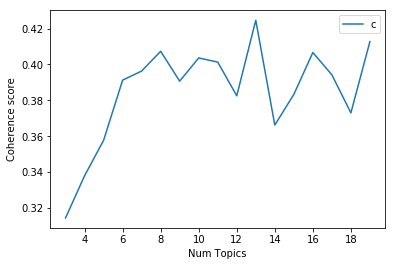

In [27]:
# Show graph
limit=20; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3144
Num Topics = 4  has Coherence Value of 0.3379
Num Topics = 5  has Coherence Value of 0.3577
Num Topics = 6  has Coherence Value of 0.3913
Num Topics = 7  has Coherence Value of 0.3963
Num Topics = 8  has Coherence Value of 0.4074
Num Topics = 9  has Coherence Value of 0.3907
Num Topics = 10  has Coherence Value of 0.4037
Num Topics = 11  has Coherence Value of 0.4013
Num Topics = 12  has Coherence Value of 0.3825
Num Topics = 13  has Coherence Value of 0.4247
Num Topics = 14  has Coherence Value of 0.3662
Num Topics = 15  has Coherence Value of 0.3833
Num Topics = 16  has Coherence Value of 0.4067
Num Topics = 17  has Coherence Value of 0.3942
Num Topics = 18  has Coherence Value of 0.373
Num Topics = 19  has Coherence Value of 0.4128


In [29]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"research" + 0.013*"grant" + 0.012*"author" + 0.011*"support" + '
  '0.009*"university" + 0.008*"science" + 0.007*"document" + '
  '0.007*"foundation" + 0.007*"part" + 0.006*"center"'),
 (1,
  '0.033*"theory" + 0.014*"example" + 0.012*"class" + 0.012*"target" + '
  '0.012*"learn" + 0.011*"show" + 0.011*"query" + 0.010*"learner" + '
  '0.009*"algorithm" + 0.008*"result"'),
 (2,
  '0.023*"problem" + 0.014*"program" + 0.012*"design" + 0.011*"genetic" + '
  '0.011*"solution" + 0.010*"use" + 0.010*"paper" + 0.009*"search" + '
  '0.008*"population" + 0.007*"result"'),
 (3,
  '0.043*"system" + 0.025*"knowledge" + 0.024*"design" + 0.021*"case" + '
  '0.015*"domain" + 0.013*"user" + 0.013*"reasoning" + 0.011*"process" + '
  '0.010*"attribute" + 0.009*"paper"'),
 (4,
  '0.029*"learn" + 0.015*"task" + 0.015*"control" + 0.014*"learning" + '
  '0.014*"problem" + 0.013*"system" + 0.012*"model" + 0.011*"paper" + '
  '0.011*"state" + 0.010*"environment"'),
 (5,
  '0.049*"network" + 0.034

### Recherche du topic dominant par phrase

In [30]:
optimal_model.get_topic_terms(1,10)

[(250, 0.03278394),
 (86, 0.013959116),
 (302, 0.012054014),
 (652, 0.011823215),
 (101, 0.01161239),
 (61, 0.011146381),
 (777, 0.011138777),
 (391, 0.010090653),
 (0, 0.008671455),
 (110, 0.0083892625)]

In [31]:
df=pd.DataFrame(data=optimal_model.get_topics())

In [32]:
df

,0,1,2,3,4,5,6,7,8,9,...,11576,11577,11578,11579,11580,11581,11582,11583,11584,11585
0,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,...,0.000018,0.000018,0.000014,0.000014,0.000014,0.000014,0.000608,0.000608,0.000608,0.000608
1,0.008671,0.000009,0.000009,0.000009,0.000286,0.000020,0.000009,0.000009,0.000009,0.000009,...,0.000013,0.000013,0.000009,0.000014,0.000022,0.000009,0.000010,0.000010,0.000010,0.000010
2,0.000004,0.000004,0.000004,0.001293,0.000004,0.003175,0.000475,0.001295,0.000004,0.000542,...,0.000159,0.000159,0.000162,0.000011,0.000126,0.000159,0.000004,0.000004,0.000004,0.000004
3,0.000008,0.000008,0.000008,0.000008,0.000008,0.006611,0.000556,0.000008,0.000008,0.000008,...,0.000009,0.000009,0.000008,0.000630,0.000037,0.000016,0.000008,0.000008,0.000008,0.000008
4,0.001835,0.000005,0.000005,0.000488,0.000254,0.003987,0.001468,0.000005,0.000005,0.000010,...,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000005,0.000005,0.000005,0.000005
5,0.000009,0.000009,0.000009,0.000009,0.000009,0.000189,0.000009,0.000009,0.000009,0.000009,...,0.000012,0.000012,0.000009,0.000014,0.000020,0.000009,0.000010,0.000010,0.000010,0.000010
6,0.002051,0.000005,0.000211,0.001075,0.001474,0.002969,0.000005,0.000005,0.000058,0.000005,...,0.000006,0.000006,0.000006,0.000005,0.000006,0.000007,0.000005,0.000005,0.000005,0.000005
7,0.034667,0.001457,0.000002,0.001245,0.000743,0.006151,0.003491,0.000002,0.000002,0.002101,...,0.000003,0.000003,0.000004,0.000005,0.000009,0.000003,0.000003,0.000003,0.000003,0.000003


### Importation des Candidats

In [33]:
# Import Dataset
os.chdir("C:/Users/thoma/Documents/Stage Cambon/Donnees/")
dfCandidat = pd.read_csv('nounPhraseDBLP.txt', header=None,names=["content"])
lCandidat = dfCandidat.content.tolist()
lCandidat=np.asarray(lCandidat)
lCandidat[:10]

array(['knowledge-based extraction', 'expertise', 'identification',
       'information', 'management', 'unrecognized side', 'web search',
       'machine', 'learning', 'third-party distribution'], dtype='<U69')

In [34]:
#type(lCandidat)

### On crée la fréquence pour chaque mot sur l'ensemble du corpus

In [35]:
# theta matrice des freq sachant le document
theta=df.values

#theta=np.transpose(theta)
theta.shape

(8, 11586)

In [36]:
freq.shape

(1, 11586)

In [37]:
print(freq)

[[1.25006884e-02 5.17649650e-04 9.36174899e-05 ... 5.50691117e-06
  5.50691117e-06 5.50691117e-06]]


In [38]:
# on le repete 8 fois pour avoir la meme taille que la matrice theta
freq=np.ones((8,1))*freq


In [39]:
freq

matrix([[1.25006884e-02, 5.17649650e-04, 9.36174899e-05, ...,
         5.50691117e-06, 5.50691117e-06, 5.50691117e-06],
        [1.25006884e-02, 5.17649650e-04, 9.36174899e-05, ...,
         5.50691117e-06, 5.50691117e-06, 5.50691117e-06],
        [1.25006884e-02, 5.17649650e-04, 9.36174899e-05, ...,
         5.50691117e-06, 5.50691117e-06, 5.50691117e-06],
        ...,
        [1.25006884e-02, 5.17649650e-04, 9.36174899e-05, ...,
         5.50691117e-06, 5.50691117e-06, 5.50691117e-06],
        [1.25006884e-02, 5.17649650e-04, 9.36174899e-05, ...,
         5.50691117e-06, 5.50691117e-06, 5.50691117e-06],
        [1.25006884e-02, 5.17649650e-04, 9.36174899e-05, ...,
         5.50691117e-06, 5.50691117e-06, 5.50691117e-06]])

In [40]:
print(theta)

[[1.44487185e-05 1.44584719e-05 1.44375781e-05 ... 6.07891125e-04
  6.07891125e-04 6.07891125e-04]
 [8.67145509e-03 8.73529370e-06 8.76015929e-06 ... 9.76300998e-06
  9.76300998e-06 9.76300998e-06]
 [3.92418815e-06 3.92452557e-06 3.92857874e-06 ... 4.05258925e-06
  4.05258925e-06 4.05258925e-06]
 ...
 [8.63070909e-06 8.62521028e-06 8.62946581e-06 ... 9.86312716e-06
  9.86312716e-06 9.86312716e-06]
 [2.05140328e-03 4.59598095e-06 2.11080551e-04 ... 4.72223519e-06
  4.72223519e-06 4.72223519e-06]
 [3.46665718e-02 1.45687989e-03 2.22152994e-06 ... 2.73880141e-06
  2.73880141e-06 2.73880141e-06]]


### Fonction qui retourne les 10 meilleurs score

In [41]:
def top10Score(score,lcandidat):
    """
    Return arrays that contain info about the top 10 score, in descending order

    Parameters:
    ----------
    score : Array containing the score of each label candidate
    lcandidat: Array containing each label candidate
    Returns:
    -------
    topValue : Array containing score of top 10 topic models in descending order
    topCandidate : Name of the top 10 score candidate in descending order
    """
    
    #on récupère l'indexe des 10 meilleurs score (dans les desordre)
    i=np.argpartition(score,len(score)-10)[-10:]

    # on recupere les indices qui trieraient les nombres dans le bonne ordre (ils vont de 0 à 9)
    ind=score[i].argsort()

    #on inverse la liste pour faire du plus grand au plus petit
    indf=np.flip(ind)
    
    topValue=(score[i])[indf]
    topCandidate=(lCandidat)[i][indf]
    
    return topValue, topCandidate

### Zero-Order

In [42]:
k=3

In [43]:
def zero_order(freq,theta,lcandidat,NumTopic):
    """
    Calculate the Zero-Order Relevance

    Parameters:
    ----------
    freq : Array containing the frequency of occurrences of each word in the whole corpus
    theta : Array containing the frequency of occurrences of each word in each topic
    lcandidat: Array containing each label candidate
    NumTopic : The number of the topic
    
    Returns:
    -------
    topCandidate : Array containing the name of the top 10 score candidate for a given topic
    """
    
    #W matrice qui contient le score de chaque mot pour chaque topic
    W=np.log(theta/freq)
    
    # score des tous les candidats pour le topic NumTopic
    score=np.array([])
    
    for indice in range (len(lCandidat)):
        candidat=lCandidat[indice].split(" ")
        i=id2word.doc2idx(candidat)
        score=np.append(score,np.sum(W[k,i]))
        
    topValue, topCandidate = top10Score(score,lCandidat)
  
    return topValue,topCandidate

In [44]:
#topValue, topCandidate = top10Score(score,lCandidat)

In [45]:
topValue, topCandidate = zero_order(freq,theta,lCandidat,k)

In [46]:
topValue

array([7.36787981, 7.05711976, 6.80949415, 6.65361226, 6.37029494,
       6.34168364, 6.32584986, 6.263988  , 6.19778688, 6.18820058])

In [47]:
topCandidate

array(['fuzzy semantic web', 'flexible semantic web',
       'fuzzy logic engine',
       'a possibilistic-like many-sorted propositional logic',
       'icon language', 'an interactive computer-based tutor',
       'a semantic integrity', 'text corpus', 'a conceptual web',
       'fuzzy logic programming'], dtype='<U69')

### M order

In [48]:
def m_order(freq,theta,lcandidat,k):
    """
    Calculate the M-Order Relevance

    Parameters:
    ----------
    freq : Array containing the frequency of occurrences of each word in the whole corpus
    theta : Array containing the frequency of occurrences of each word in each topic
    lcandidat: Array containing each label candidate
    k : The number of the topic
    
    Returns:
    -------
    topCandidate : Array containing the name of the top 10 score candidate for a given topic
    """
    # bob la liste qui contient tous les numéros de topic (lignes), sauf celui du topic selectionné
    bob =list(range(8))
    del bob[k]
    
    # M la moyenne des proba d'avoir le mot, sachant qu'on est pas dans le topic k
    M=theta[bob,:].mean(axis=0)
    
    #W matrice qui contient le score de chaque mot pour chaque topic
    W=np.log(theta[k]/M)
    
    score=np.array([])
    for indice in range (len(lCandidat)):
        # On sépare chaque terme candidat en mots
        candidat=lCandidat[indice].split(" ")
        # i est une liste qui contient les numéros des mots qui sont candidats
        i=id2word.doc2idx(candidat)
        # Score contient la somme des scores des mots du meme candidat
        score=np.append(score,np.sum(W[i]))
    #On appel la fonction qui trie dans le bonne ordre
    topValue, topCandidate = top10Score(score,lCandidat)

    return topValue, topCandidate

In [49]:
topValue, topCandidate = m_order(freq,theta,lCandidat,k)

In [50]:
#topValue, topCandidate = top10Score(score,lCandidat)


In [51]:
topValue

array([16.84924316, 15.40646553, 14.64180756, 14.58904457, 14.23896503,
       13.51176071, 13.40352345, 13.21150017, 13.17193794, 12.94283485])

In [52]:
topCandidate

array(['fuzzy semantic web', 'fuzzy logic engine',
       'fuzzy logic programming', 'fuzzy evidential reasoning',
       'flexible semantic web', 'conceptual reasoning',
       'interactive semantic concept', 'fuzzy reasoning',
       'user expertise', 'propositional logic'], dtype='<U69')

# C-value

Source : https://github.com/huanyannizu/C-Value-Term-Extraction

In [53]:
noun = ['NN','NNS','NNP','NNPS']#tags of noun
adj = ['JJ']#tags of adjective
pre = ['IN']#tags of preposition

In [159]:
from NoName import NoName

In [55]:
# source : https://github.com/huanyannizu/C-Value-Term-Extraction
os.chdir("C:/Users/thoma/Documents/Stage Cambon/Donnees/wikiTagged")
Data= 'MiniNounPhraseWiki02tag.txt' #input data file
#f = open(Data,encoding='utf8').readlines()
#f
df = pd.read_csv(Data,header=None, names=["content"])
# Convert to list
f = df.content.tolist()
f






['afonso_JJ vi_NN of_IN portugal_NN ',
 'afonso_RB vi_JJ english_JJ alphonzo_NN or_CC alphonse_NN old_JJ portuguese_JJ affonso_NN 21_CD august_NN 1643_CD 12_CD september_NN 1683_CD was_VBD king_VBG of_IN portugal_NN and_CC the_DT algarves_NNS the_DT second_NN of_IN the_DT house_NN of_IN braganza_NN known_VBN as_IN the_DT victorious_JJ ',
 'early_JJ life_NN ',
 'at_IN the_DT age_NN of_IN three_CD afonso_NN suffered_VBD an_DT illness_NN that_WDT left_VBD him_PRP paralyzed_VB on_IN the_DT left_JJ side_NN of_IN his_PRP$ body_NN as_RB well_RB as_IN leaving_VBG him_PRP mentally_RB unstable_JJ his_PRP$ father_NN created_VBD him_PRP 10th_JJ duke_NN of_IN braganza_NN ',
 'after_IN the_DT 1653_CD death_NN of_IN his_PRP$ eldest_JJS brother_NN teodósio_NN prince_NN of_IN brazil_JJ afonso_NN became_VBD the_DT heir_NN apparent_NN to_TO the_DT throne_NN of_IN the_DT kingdom_NN he_PRP received_VBD also_RB the_DT crown_NN princely_RB title_JJ 2nd_CD prince_NN of_IN brazil_NN ',
 'succession_NN ',
 'por

In [142]:
#lingui_filter= 'AdjNoun'
lingui_filter='AdjPrepNoun'
L=10 #the expected maximum length of a term
freq_threshold=0.2
CValue_threshold=0.2

In [143]:
os.chdir('C:\\Users\\thoma')

In [144]:
pwd

'C:\\Users\\thoma'

In [145]:
sentence=f[0].split(' ')
sentence
sentence[0].split('_')

['afonso', 'JJ']

In [146]:
sentence

['afonso_JJ', 'vi_NN', 'of_IN', 'portugal_NN', '']

In [147]:
sentence = sentence[:-1]
sentence

['afonso_JJ', 'vi_NN', 'of_IN', 'portugal_NN']

### Crétion des candidats

In [148]:
## test avec la classe
candidate = candidate = dict([(key, []) for key in range(2,L+1)]) 
for sentence in f:
    sentence = sentence.rstrip('\n').split(' ') 
    n_words = len(sentence)
    start=0
    while start < n_words - 2:
        print("start= ",start)
        print("limite= ",n_words-2)
        i =  start
        noun_ind = []
        pre_ind = []
        pre_exist = False
        while True:
            #print("limite = i<",n_words-2)
            word = NoName()
            print("i= ", i)
            if (i>=n_words-2):
                break
            word.word(sentence[i])
            print("word : ",word.word)
            print("tag : ",word.tag)

            if word.tag in noun:
                noun_ind.append(i)
                i += 1
            elif (lingui_filter == ('AdjNoun' or 'AdjPrepNoun')) and word.tag in adj:
                word_next = NoName()
                word_next.word(sentence[i+1])
                if word_next.tag in noun: 
                    noun_ind.append(i+1)
                    i += 2
                elif word_next.tag in adj:
                    i += 2
                else: 
                    end = i+1
                    break
            elif (lingui_filter == 'AdjPrepNoun') and not pre_exist and i != 0 and (word.tag in pre):
                pre_ind.append(i)
                pre_exist = True
                i += 1
            else: 
                end = i
                break

        if len(noun_ind) != 0:
            print("noun_ind = ",noun_ind)
            print("pre_ind = ", pre_ind)
            for i in list(set(range(start,noun_ind[-1]))-set(pre_ind)):
                for j in noun_ind:
                    if j-i >= 1 and j-i <= L-1:
                        substring = NoName()
                        substring.substring(sentence[i:j+1])
                        print("substring : ",substring.substring(sentence[i:j+1]))
                        exist = False
                                                
                        for x in candidate[j-i+1]:
                            print("x= ",x)
                            print("x.words: ",x.words)
                            print("substring.words: ",substring.words)
                            if x.words == substring.words:
                                x.f += 1
                                exist = True
                        if not exist:
                            print("not exist")
                            print("index: ",j-i+1)
                            print("substring : ",substring.words)
                            #candidate[j-i+1].append(" ".join(substring.words))
                            candidate[j-i+1].append(substring)
                            substring.f = 1
        start =  start + 1

start=  0
limite=  3
i=  0
word :  afonso
tag :  JJ
start=  1
limite=  3
i=  1
word :  vi
tag :  NN
i=  2
word :  of
tag :  IN
i=  3
noun_ind =  [1]
pre_ind =  [2]
start=  2
limite=  3
i=  2
word :  of
tag :  IN
i=  3
start=  0
limite=  32
i=  0
word :  afonso
tag :  RB
start=  1
limite=  32
i=  1
word :  vi
tag :  JJ
start=  2
limite=  32
i=  2
word :  english
tag :  JJ
start=  3
limite=  32
i=  3
word :  alphonzo
tag :  NN
i=  4
word :  or
tag :  CC
noun_ind =  [3]
pre_ind =  []
start=  4
limite=  32
i=  4
word :  or
tag :  CC
start=  5
limite=  32
i=  5
word :  alphonse
tag :  NN
i=  6
word :  old
tag :  JJ
noun_ind =  [5]
pre_ind =  []
start=  6
limite=  32
i=  6
word :  old
tag :  JJ
start=  7
limite=  32
i=  7
word :  portuguese
tag :  JJ
start=  8
limite=  32
i=  8
word :  affonso
tag :  NN
i=  9
word :  21
tag :  CD
noun_ind =  [8]
pre_ind =  []
start=  9
limite=  32
i=  9
word :  21
tag :  CD
start=  10
limite=  32
i=  10
word :  august
tag :  NN
i=  11
word :  1643
tag :  CD


word :  to
tag :  TO
start=  18
limite=  33
i=  18
word :  the
tag :  DT
start=  19
limite=  33
i=  19
word :  throne
tag :  NN
i=  20
word :  of
tag :  IN
i=  21
word :  the
tag :  DT
noun_ind =  [19]
pre_ind =  [20]
start=  20
limite=  33
i=  20
word :  of
tag :  IN
i=  21
word :  the
tag :  DT
start=  21
limite=  33
i=  21
word :  the
tag :  DT
start=  22
limite=  33
i=  22
word :  kingdom
tag :  NN
i=  23
word :  he
tag :  PRP
noun_ind =  [22]
pre_ind =  []
start=  23
limite=  33
i=  23
word :  he
tag :  PRP
start=  24
limite=  33
i=  24
word :  received
tag :  VBD
start=  25
limite=  33
i=  25
word :  also
tag :  RB
start=  26
limite=  33
i=  26
word :  the
tag :  DT
start=  27
limite=  33
i=  27
word :  crown
tag :  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




substring.words:  ['luisa', 'of', 'medina']
substring :  None
x=  <NoName.NoName object at 0x0000022B24C377F0>
x.words:  ['mother', 'luisa', 'of', 'medina']
substring.words:  ['luisa', 'of', 'medina', 'sidonia']
x=  <NoName.NoName object at 0x0000022B14CE22B0>
x.words:  ['luisa', 'of', 'medina', 'sidonia']
substring.words:  ['luisa', 'of', 'medina', 'sidonia']
start=  16
limite=  98
i=  16
word :  of
tag :  IN
i=  17
word :  medina
tag :  NN
i=  18
word :  sidonia
tag :  NN
i=  19
word :  was
tag :  VBD
noun_ind =  [17, 18]
pre_ind =  [16]
substring :  None
x=  <NoName.NoName object at 0x0000022B2461EC88>
x.words:  ['teodósio', 'prince']
substring.words:  ['medina', 'sidonia']
x=  <NoName.NoName object at 0x0000022B2461E828>
x.words:  ['brother', 'teodósio']
substring.words:  ['medina', 'sidonia']
x=  <NoName.NoName object at 0x0000022B2461EC50>
x.words:  ['heir', 'apparent']
substring.words:  ['medina', 'sidonia']
x=  <NoName.NoName object at 0x0000022B24C37438>
x.words:  ['father', 

noun_ind =  [43]
pre_ind =  [44]
start=  44
limite=  98
i=  44
word :  for
tag :  IN
i=  45
word :  six
tag :  CD
start=  45
limite=  98
i=  45
word :  six
tag :  CD
start=  46
limite=  98
i=  46
word :  years
tag :  NNS
i=  47
word :  until
tag :  IN
i=  48
word :  1662
tag :  CD
noun_ind =  [46]
pre_ind =  [47]
start=  47
limite=  98
i=  47
word :  until
tag :  IN
i=  48
word :  1662
tag :  CD
start=  48
limite=  98
i=  48
word :  1662
tag :  CD
start=  49
limite=  98
i=  49
word :  afonso
tag :  NN
i=  50
word :  oversaw
tag :  VBD
noun_ind =  [49]
pre_ind =  []
start=  50
limite=  98
i=  50
word :  oversaw
tag :  VBD
start=  51
limite=  98
i=  51
word :  decisive
tag :  JJ
start=  52
limite=  98
i=  52
word :  military
tag :  JJ
start=  53
limite=  98
i=  53
word :  victories
tag :  NNS
i=  54
word :  over
tag :  IN
i=  55
word :  the
tag :  DT
noun_ind =  [53]
pre_ind =  [54]
start=  54
limite=  98
i=  54
word :  over
tag :  IN
i=  55
word :  the
tag :  DT
start=  55
limite=  98
i

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




limite=  63
i=  30
word :  for
tag :  IN
i=  31
word :  afonso
tag :  JJ
start=  31
limite=  63
i=  31
word :  afonso
tag :  JJ
start=  32
limite=  63
i=  32
word :  s
tag :  JJ
start=  33
limite=  63
i=  33
word :  sister
tag :  NN
i=  34
word :  catherine
tag :  NN
i=  35
word :  of
tag :  IN
i=  36
word :  braganza
tag :  NN
i=  37
word :  who
tag :  WP
noun_ind =  [33, 34, 36]
pre_ind =  [35]
substring :  None
x=  <NoName.NoName object at 0x0000022B2461EC88>
x.words:  ['teodósio', 'prince']
substring.words:  ['sister', 'catherine']
x=  <NoName.NoName object at 0x0000022B2461E828>
x.words:  ['brother', 'teodósio']
substring.words:  ['sister', 'catherine']
x=  <NoName.NoName object at 0x0000022B2461EC50>
x.words:  ['heir', 'apparent']
substring.words:  ['sister', 'catherine']
x=  <NoName.NoName object at 0x0000022B24C37438>
x.words:  ['father', 'joão']
substring.words:  ['sister', 'catherine']
x=  <NoName.NoName object at 0x0000022B24C37E10>
x.words:  ['joão', 'iv']
substring.words:

substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B24C37EB8>
x.words:  ['medina', 'sidonia']
substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B24C37898>
x.words:  ['mother', 'luisa']
substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B24E935F8>
x.words:  ['father', 's']
substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B24C37550>
x.words:  ['portugal', 's']
substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B23EDE5F8>
x.words:  ['sister', 'catherine']
substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B27C03908>
x.words:  ['king', 'charles']
substring.words:  ['charles', 'ii']
x=  <NoName.NoName object at 0x0000022B27C03F28>
x.words:  ['charles', 'ii']
substring.words:  ['charles', 'ii']
substring :  None
x=  <NoName.NoName object at 0x0000022B24C377F0>
x.words:  ['mother', 'luisa', 'of', 'medina']
substring.words:  ['charles', 'ii', 'of', 'engla

x.words:  ['heir', 'apparent']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B24C37438>
x.words:  ['father', 'joão']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B24C37E10>
x.words:  ['joão', 'iv']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B24C37EB8>
x.words:  ['medina', 'sidonia']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B24C37898>
x.words:  ['mother', 'luisa']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B24E935F8>
x.words:  ['father', 's']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B24C37550>
x.words:  ['portugal', 's']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B23EDE5F8>
x.words:  ['sister', 'catherine']
substring.words:  ['castelo', 'melhor']
x=  <NoName.NoName object at 0x0000022B27C03908>
x.words:  ['king', 'charles']
substring.words:  ['cas

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B24C37908>
x.words:  ['king', 'charles', 'ii']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B1D755748>
x.words:  ['ii', 'of', 'england']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B244A4400>
x.words:  ['rule', 'of', 'brazil']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B1D755550>
x.words:  ['brazil', 'in', 'return']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B24C37470>
x.words:  ['count', 'of', 'castelo']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B244A4A58>
x.words:  ['power', 'at', 'court']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B244A4668>
x.words:  ['françoise', 'of', 'nemours']
substring.words:  ['duke', 'of', 'beja']
x=  <NoName.NoName object at 0x0000022B244A4B38>
x.words:  ['duke', 'of',

x=  <NoName.NoName object at 0x0000022B244A4978>
x.words:  ['marie', 'françoise']
substring.words:  ['brother', 'pedro']
x=  <NoName.NoName object at 0x0000022B244A4D30>
x.words:  ['maria', 'francisca']
substring.words:  ['brother', 'pedro']
x=  <NoName.NoName object at 0x0000022B26365048>
x.words:  ['pedro', 'duke']
substring.words:  ['brother', 'pedro']
x=  <NoName.NoName object at 0x0000022B26365470>
x.words:  ['s', 'brother']
substring.words:  ['brother', 'pedro']
not exist
index:  2
substring :  ['brother', 'pedro']
substring :  None
x=  <NoName.NoName object at 0x0000022B2461E9E8>
x.words:  ['house', 'of', 'braganza']
substring.words:  ['brother', 'pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B2461E898>
x.words:  ['brother', 'teodósio', 'prince']
substring.words:  ['brother', 'pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24C37BA8>
x.words:  ['father', 'joão', 'iv']
substring.words:  ['brother', 'pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24C37668>
x

tag :  IN
i=  59
word :  beja
tag :  NN
i=  60
word :  the
tag :  DT
noun_ind =  [56, 57, 59]
pre_ind =  [58]
substring :  None
x=  <NoName.NoName object at 0x0000022B2461EC88>
x.words:  ['teodósio', 'prince']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B2461E828>
x.words:  ['brother', 'teodósio']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B2461EC50>
x.words:  ['heir', 'apparent']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24C37438>
x.words:  ['father', 'joão']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24C37E10>
x.words:  ['joão', 'iv']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24C37EB8>
x.words:  ['medina', 'sidonia']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24C37898>
x.words:  ['mother', 'luisa']
substring.words:  ['pedro', 'duke']
x=  <NoName.NoName object at 0x0000022B24E935F8>
x.words:  ['fa

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['grilo', 's']
x=  <NoName.NoName object at 0x0000022B24EC4940>
x.words:  ['mário', 'grilo']
substring.words:  ['grilo', 's']
substring :  None
x=  <NoName.NoName object at 0x0000022B2461EC88>
x.words:  ['teodósio', 'prince']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B2461E828>
x.words:  ['brother', 'teodósio']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B2461EC50>
x.words:  ['heir', 'apparent']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B24C37438>
x.words:  ['father', 'joão']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B24C37E10>
x=  <NoName.NoName object at 0x0000022B244A4D30>
x.words:  ['maria', 'francisca']
substring.words:  ['mário', 'grilo']
x=  <NoName.NoName object at 0x0000022B26365048>
x.words:  ['pedro', 'duke']
substring.words:  ['mário', 'grilo']
x=  <NoName.NoName object at 0x0000022B26365470>
x.words:  ['s', 'brother']
substring.words:  ['mário', 'gr

substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B24C37898>
x.words:  ['mother', 'luisa']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B24E935F8>
x.words:  ['father', 's']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B24C37550>
x.words:  ['portugal', 's']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B23EDE5F8>
x.words:  ['sister', 'catherine']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B27C03908>
x.words:  ['king', 'charles']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B27C03F28>
x.words:  ['charles', 'ii']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B24AAC780>
x.words:  ['castelo', 'melhor']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B244A4978>
x.words:  ['marie', 'françoise']
substring.words:  ['joão', 'mário']
x=  <NoName.NoName object at 0x0000022B244A

substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B23EDE5C0>
x.words:  ['mother', 'as', 'regent']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B11751828>
x.words:  ['recognition', 'of', 'sovereignty']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B24C37D68>
x.words:  ['cession', 'of', 'bombay']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B24C372E8>
x.words:  ['catherine', 'of', 'braganza']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B24C37908>
x.words:  ['king', 'charles', 'ii']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B1D755748>
x.words:  ['ii', 'of', 'england']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B244A4400>
x.words:  ['rule', 'of', 'brazil']
substring.words:  ['mário', 'grilo', 's']
x=  <NoName.NoName object at 0x0000022B1D755550>
x.w

x.words:  ['father', 'joão']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B24C37E10>
x.words:  ['joão', 'iv']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B24C37EB8>
x.words:  ['medina', 'sidonia']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B24C37898>
x.words:  ['mother', 'luisa']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B24E935F8>
x.words:  ['father', 's']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B24C37550>
x.words:  ['portugal', 's']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B23EDE5F8>
x.words:  ['sister', 'catherine']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B27C03908>
x.words:  ['king', 'charles']
substring.words:  ['o', 'processo']
x=  <NoName.NoName object at 0x0000022B27C03F28>
x.words:  ['charles', 'ii']
substring.words:  ['o', 'processo']
x=  <NoName.NoName obj

In [102]:
type(candidate)

dict

In [149]:
##Remove candidate strings with low frequency and sort them##################################################################################            
for i in range(2,L+1):
    candidate[i] = [x for x in candidate[i] if x.f > freq_threshold]  
    candidate[i].sort(key=lambda x: x.f, reverse=True) 

In [153]:
list(candidate.values())[0][0].tag

['NN', 'NN']

In [164]:
math.log2(3)

1.584962500721156

In [163]:
##Compute C-Value##################################################################################
Term = []           
for l in reversed(range(2,L+1)):
    candi = candidate[l]
    for phrase in candi:
        if phrase.c == 0:
            phrase.CValue_non_nested()
        else: phrase.CValue_nested()         
        
        if phrase.CValue >= CValue_threshold: 
            Term.append(phrase)
            for j in range(2,phrase.L):
                for i in range(phrase.L-j+1):
                    substring = phrase.words[i:i+j]
                    for x in candidate[j]:
                        if substring == x.words:
                            x.substringInitial(phrase.f)
                            for m in Term:
                                if ' '.join(x.words) in ' '.join(m.words): 
                                    x.revise(m.f,m.t)
                                                            
Term.sort(key=lambda x: x.CValue, reverse=True) 

NameError: name 'math' is not defined

In [155]:
candidate

{2: [<NoName.NoName at 0x22b2461e208>,
 3: [<NoName.NoName at 0x22b24c375c0>,
 4: [<NoName.NoName at 0x22b26365080>,
 5: [<NoName.NoName at 0x22b26365dd8>,
 6: [<NoName.NoName at 0x22b26365978>, <NoName.NoName at 0x22b24ec4160>],
 7: [],
 8: [],
 9: [],
 10: []}